<a href="https://colab.research.google.com/github/hlcubiot/Hannah-work/blob/main/Module7_EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Data NLP Algorithms**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1oajLxGcuCSXzUnBR5BWsVDVLAkClBQ3C'})
downloaded.GetContentFile('IMDBDataset.csv')

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import pandas as pd

In [ ]:
def calculate_compound_sentiment(text):

    analyzer = SentimentIntensityAnalyzer()

    sentiment_scores = analyzer.polarity_scores(text)

    compound_score = sentiment_scores['compound']

    return compound_score


In [ ]:
text = "This is a great day. I feel happy!"

compound_sentiment = calculate_compound_sentiment(text)

print("Compound Sentiment Score:", compound_sentiment)

Compound Sentiment Score: 0.8439


In [ ]:
usecol = ["review"]
IMBD_data = pd.read_csv("IMDBDataset.csv", index_col="review", usecols=usecol)


In [ ]:
for text in usecol:
    calculate_compound_sentiment(text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df = pd.read_csv('IMDBDataset.csv', encoding='ISO-8859-1')

In [ ]:
text_sentiment_scores = []

In [ ]:
for review in df['review']:
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']
    text_sentiment_scores.append((review, compound_score))

In [ ]:
compound_sentiments = [score for _, score in text_sentiment_scores]

In [ ]:
num_clusters = 28  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit([[score] for score in compound_sentiments])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=28)

In [ ]:
cluster_centers = kmeans.cluster_centers_

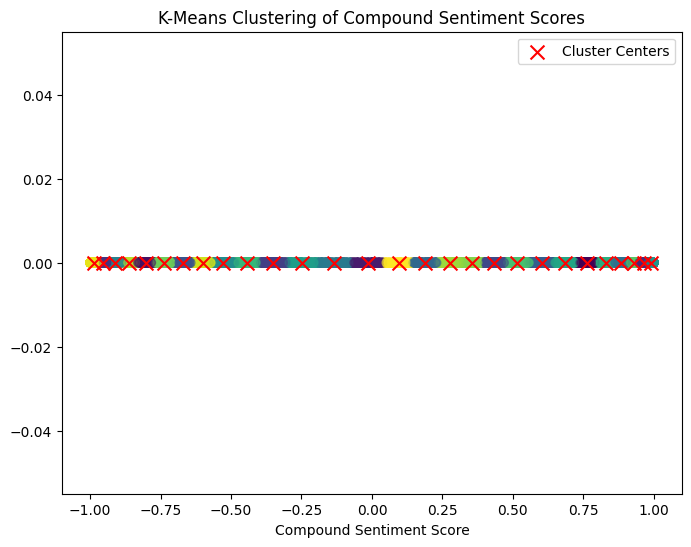

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(compound_sentiments, [0] * len(compound_sentiments), c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers, [0] * len(cluster_centers), marker='x', c='red', s=100, label='Cluster Centers')
plt.xlabel('Compound Sentiment Score')
plt.title('K-Means Clustering of Compound Sentiment Scores')
plt.legend()
plt.show()

In [ ]:
clusterranges = []
for cluster_label in range(num_clusters):
  cluster_values = [compound_sentiments[i] for i, label in enumerate(kmeans.labels_) if label == cluster_label]
  cluster_min = min(cluster_values)
  cluster_max = max(cluster_values)
  clusterranges.append((cluster_min, cluster_max))

In [ ]:
for i, (cluster_min, cluster_max) in enumerate(clusterranges):
    print("Cluster {} range: {:.2f} to {:.2f}".format(i+1, cluster_min, cluster_max))


Cluster 1 range: 0.73 to 0.80
Cluster 2 range: -0.83 to -0.77
Cluster 3 range: -0.07 to 0.04
Cluster 4 range: 0.95 to 0.98
Cluster 5 range: -0.97 to -0.93
Cluster 6 range: -0.40 to -0.30
Cluster 7 range: 0.39 to 0.47
Cluster 8 range: -0.71 to -0.64
Cluster 9 range: 0.56 to 0.64
Cluster 10 range: 0.14 to 0.23
Cluster 11 range: 0.86 to 0.91
Cluster 12 range: -0.19 to -0.07
Cluster 13 range: -0.93 to -0.89
Cluster 14 range: -0.56 to -0.49
Cluster 15 range: 0.98 to 1.00
Cluster 16 range: -0.30 to -0.19
Cluster 17 range: 0.64 to 0.72
Cluster 18 range: 0.80 to 0.86
Cluster 19 range: -0.49 to -0.40
Cluster 20 range: 0.47 to 0.56
Cluster 21 range: 0.91 to 0.95
Cluster 22 range: -0.77 to -0.71
Cluster 23 range: 0.32 to 0.39
Cluster 24 range: 0.23 to 0.32
Cluster 25 range: -0.89 to -0.83
Cluster 26 range: -0.64 to -0.56
Cluster 27 range: -1.00 to -0.97
Cluster 28 range: 0.04 to 0.14


LDA Topic Model:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Step 2: Preprocess the text data (tokenization, stop word removal, etc.) if necessary
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt


df['review'] = np.vectorize(remove_pattern)(df['review'], "@[\w]*")

In [ ]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize


In [ ]:
stop=set(stopwords.words('english'))
print(stop)


{'o', "isn't", 'being', 'from', "you're", 'yourselves', 'be', 'himself', 'aren', "doesn't", 'which', 'the', 'any', 'by', 'it', 'then', 'herself', 'off', 'now', 'him', 'those', 'having', 'and', 'some', 'weren', 'but', 'few', 'yourself', "you'll", 'are', 'if', 'them', 'after', 'such', "haven't", 'my', 'below', 'm', 'won', 'will', 'these', 'once', 'needn', 'has', 'for', 'hers', 'where', 'shouldn', 'i', 'theirs', 'itself', 'there', 'ourselves', 'that', 'before', 'your', 'each', 'because', 'did', 'an', "that'll", 'what', 'you', 'only', 'into', 'above', 'whom', 'this', 'our', 'down', 'their', "mightn't", 'couldn', 'should', "wouldn't", 'its', 'no', 'mustn', 'hasn', 'yours', "didn't", 'in', 'very', 'is', 'a', 'through', 'further', 're', 'don', 'wasn', "you'd", 'again', 'or', 'against', "hasn't", 'most', 'shan', 'own', 'during', "you've", 'here', 'as', 'do', 'up', 'of', 'y', 'll', 've', 'too', 'can', 'does', "couldn't", 'themselves', 'over', 'nor', "it's", 'when', 'his', 'hadn', "hadn't", 'not

In [ ]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['review']=df['review'].apply(remove_stopwords)

In [ ]:
vectorizer = CountVectorizer(max_df=0.5, min_df=1, stop_words='english')
X = vectorizer.fit_transform(df['review'])


In [ ]:
num_topics = 10  # You can adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [ ]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_indices = topic.argsort()[:-10 - 1:-1]  # Top 10 words for each topic
    top_words = [feature_names[i] for i in top_words_indices]
    print(", ".join(top_words))
    print()

Topic 1:
game, good, story, films, great, like, best, play, man, original

Topic 2:
amp, like, action, bad, man, scene, time, guy, gets, people

Topic 3:
life, best, like, young, time, family, films, good, way, new

Topic 4:
great, love, story, music, like, best, good, time, wonderful, cast

Topic 5:
characters, character, like, story, way, time, good, people, plot, life

Topic 6:
amp, like, funny, comedy, match, good, great, team, role, new

Topic 7:
horror, like, good, really, films, little, story, people, plot, make

Topic 8:
like, good, bad, really, time, movies, watch, think, people, acting

Topic 9:
war, book, story, films, time, love, novel, good, years, german

Topic 10:
story, life, man, people, time, world, war, like, way, character



In [ ]:
 %%shell
jupyter nbconvert --to html /content/Module7_EDA_Assignment.ipynb

[NbConvertApp] Converting notebook /content/Module7_EDA_Assignment.ipynb to html
[NbConvertApp] Writing 681616 bytes to /content/Module7_EDA_Assignment.html
